In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('D3.csv')
# Separates columns into individual arrays
X1 = dataset.values[:,0]
X2 = dataset.values[:,1]
X3 = dataset.values[:,2]
Y = dataset.values[:,3]
m = len(X1) #dim of data column
X0 = np.ones((m,1)) #creates X0 filled with 1s
X1 = X1.reshape(m,1) #transposes explanatory columns
X2 = X2.reshape(m,1)
X3 = X3.reshape(m,1)
Y = Y.reshape(m,1)

In [2]:
def find_loss(X, Y, theta):
    m = Y.shape[0]
    h = X @ theta
    error = h - Y
    J = (1 / (2 * m)) * np.sum(error ** 2)
    return J

In [3]:
def find_linear_regression(X, Y, theta, alpha, iterations):
    m = Y.shape[0]
    loss_history = np.zeros(iterations)
    for i in range(iterations):
        h = X @ theta
        error = h - Y
        dj_dtheta = (1 / m) * X.T @ error
        theta = theta - alpha * dj_dtheta
        loss_history[i] = find_loss(X, Y, theta)
    return theta, loss_history

In [4]:
iterations = 3000
alpha = 0.01
X = np.column_stack((X0, X1))
theta = np.zeros((2, 1))
theta, loss_history = find_linear_regression(X, Y, theta, alpha, iterations)
print('Theta for X1:', theta[1])
print('Theta for X0 (bias):', theta[0])

Theta for X1: [-2.03541173]
Theta for X0 (bias): [5.92043383]


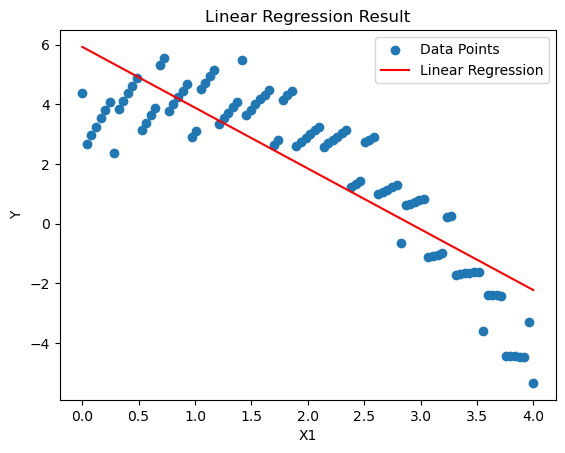

In [5]:
plt.scatter(X1, Y, label='Data Points')
plt.plot(X1, X @ theta, color='red', label='Linear Regression')
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('Linear Regression Result')
plt.legend()

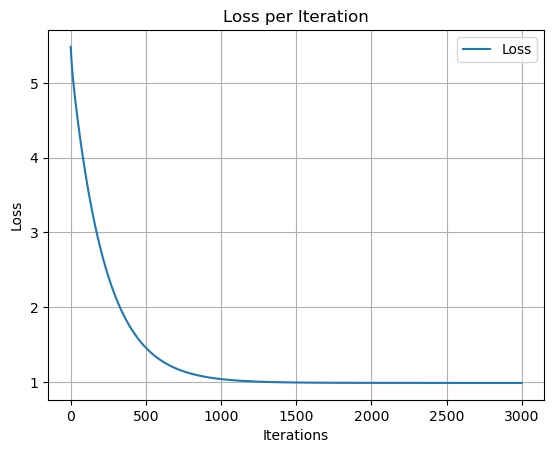

In [6]:
plt.plot(range(iterations), loss_history, label='Loss')
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss per Iteration')
plt.legend()

In [7]:
iterations = 1500
alpha = 0.08
X = np.column_stack((X0, X2))
theta = np.zeros((2, 1))
theta, loss_history = find_linear_regression(X, Y, theta, alpha, iterations)
print('Theta for X2:', theta[1])
print('Theta for X0 (bias):', theta[0])

Theta for X2: [0.55760761]
Theta for X0 (bias): [0.73606043]


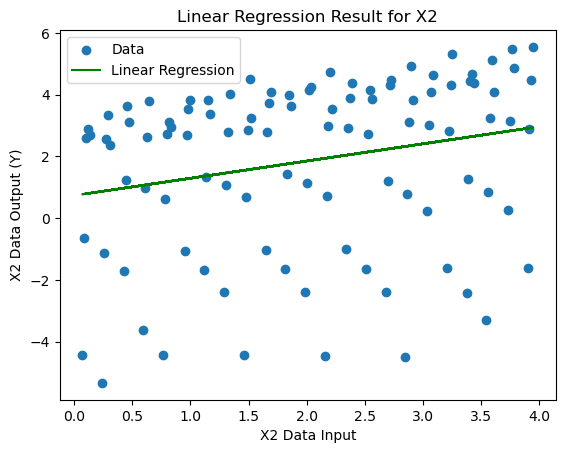

In [8]:
plt.scatter(X2, Y, label='Data')
plt.plot(X2, X.dot(theta), color='green', label='Linear Regression')
plt.xlabel('X2 Data Input')
plt.ylabel('X2 Data Output (Y)')
plt.title('Linear Regression Result for X2')
plt.legend()

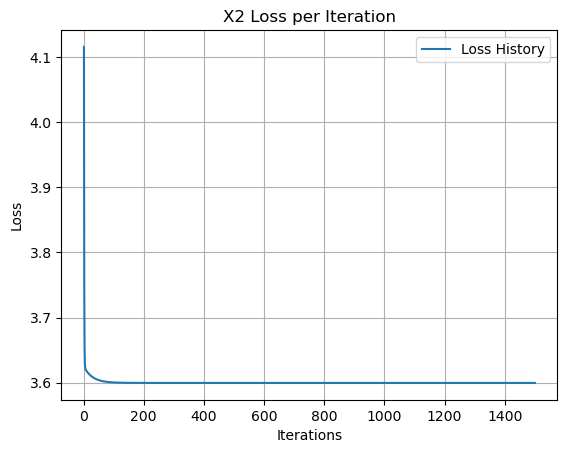

In [9]:
plt.plot(range(1, iterations + 1), loss_history, label='Loss History')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('X2 Loss per Iteration')
plt.grid(True)
plt.legend()

In [10]:
iterations = 3000
alpha = 0.01
X = np.hstack((X0,X3))
theta = np.zeros((2,1))
theta, loss_history = find_linear_regression(X, Y, theta, alpha, iterations)
print('Theta X3 =', theta)

Theta X3 = [[ 2.86831421]
 [-0.51925373]]


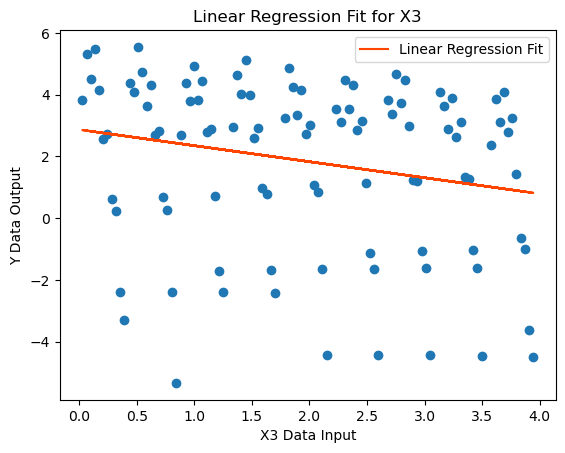

In [11]:
plt.scatter(X3, Y)
plt.plot(X3, X.dot(theta), color = 'orangered', label = 'Linear Regression Fit')
plt.xlabel('X3 Data Input')
plt.ylabel('Y Data Output')
plt.title('Linear Regression Fit for X3')
plt.legend()
plt.show()

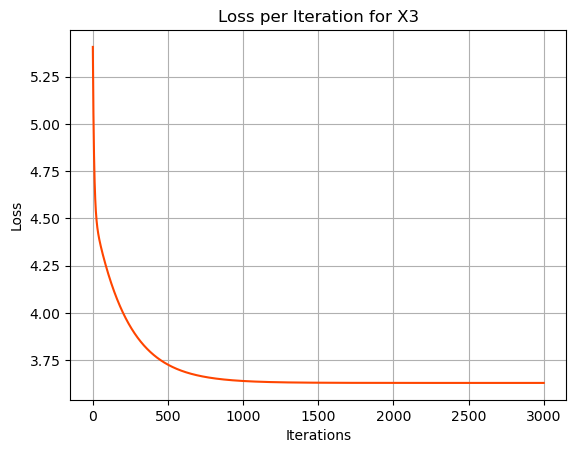

In [12]:
plt.plot(range(1, iterations + 1), loss_history, color='orangered')
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss per Iteration for X3')
plt.show()

In [13]:
iterations = 5000
alpha = 0.05
X = np.hstack((X0,X1,X2,X3))
theta = np.ones((4,1)) * 0.5

In [14]:
theta, loss_history = find_linear_regression(X, Y, theta, alpha, iterations)
print('Final theta for X_all:', theta)
print('Final loss:', loss_history[-1])

Final theta for X_all: [[ 5.31416717]
 [-2.00371927]
 [ 0.53256334]
 [-0.26560187]]
Final loss: 0.7384642415682942


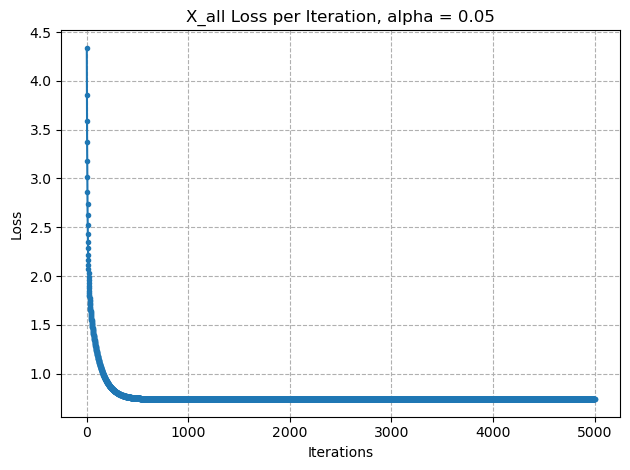

In [15]:
plt.plot(range(1, iterations + 1), loss_history, marker='o', markersize=3)
plt.grid(linestyle='--')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('X_all Loss per Iteration, alpha = 0.05')
plt.tight_layout()

In [16]:
X_test = np.array([[1,1,1,1], [1,2,0,4], [1,3,2,1]])
predictions = X_test.dot(theta)

for i, prediction in enumerate(predictions):
  print(f'Prediction {i+1} ({X_test[i,1:]}) = {prediction}')

Prediction 1 ([1 1 1]) = [3.57740937]
Prediction 2 ([2 0 4]) = [0.24432117]
Prediction 3 ([3 2 1]) = [0.10253417]
